## Probability and Sampling Distributions

**Bayes' theorem applied**

You have two coins in your hand. Out of the two coins, one is a real coin (heads and tails) and the other is a faulty coin with tails on both sides. You are blindfolded and forced to choose a random coin and then toss it in the air. The coin lands with tails facing upwards. Find the probability that this is the faulty coin.

In [1]:
# P(tails) 
print(3/4) #because there are 3 tails and 1 head between the 2 coins

# P(faulty)
print(1/2) # because there is 1 faulty coin

# P(tails and faulty), this is essentially equals to P(tails | faulty) * P(faulty), given that its faulty, the prob of tail is 1
print(1/2 * 1)

# P(faulty | tails)
print((1 / 2) / (3 / 4))

0.75
0.5
0.5
0.6666666666666666


### Bayes Bayes Babe...

<br>

P(A|B) = $\frac{P(B|A)P(A)}{P(B)}$

<br>

P(faulty | tails) = $\frac{P(tails|faulty)P(faulty)}{P(tails|faulty)P(faulty) + P(tail| not faulty)P(not faulty)}$

### Central Limit Theorem

The central limit theorem states that no matter what the shape of the distribution, the sampling distribution of the sample mean will approach the normal distribution as the sample size gets larger

insert graph

**CLT is different from law of large numbers**

### Law of large number
As the size of the sample increase, the estimate of the sample mean will more accurately reflect the population mean


In [2]:
from numpy.random import randint

small = randint(1,7,10)

small_mean = small.mean()
print(small_mean)

large = randint(1,7,10000)

large_mean = large.mean()
print(large_mean)

4.0
3.4987


**Simulate CLT**

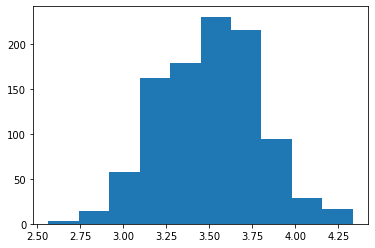

In [3]:
import matplotlib.pyplot as plt

means = [randint(1, 7, 30).mean() for i in range(1000)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

# see, this is the sample mean from 1000 samples and it resembles a normal distribution

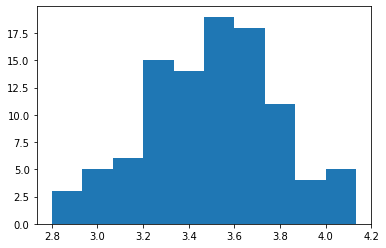

In [4]:
# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

# see, this is the sample mean from 100 samples and it still resembles a normal distribution

Bernoulli
Binomial
Poisson
Normal
insert graph


**PMF**: The PMF is one way to describe the distribution of a discrete random variable

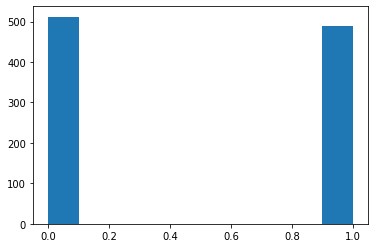

In [5]:
# Generate BERNOULLI data
from scipy.stats import bernoulli
data = bernoulli.rvs(p=0.5, size=1000)

# Plot distribution
plt.hist(data)
plt.show()

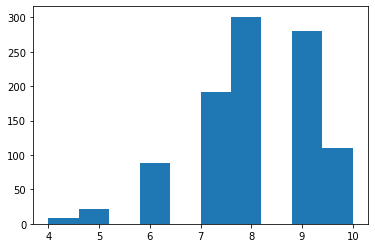

0.6241903616
0.10737418240000005


In [6]:
# BINOMIAL,is used to model the number of successful outcomes in trials where there is some consistent probability of success.
# Generate binomial data
from scipy.stats import binom
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

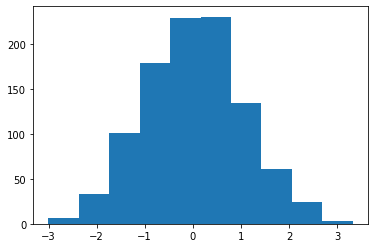

0.02275013194817921
0.029


In [7]:
# Generate NORMAL data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.show()

# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print(true_prob)

# Compute and print sample probability for greater than 2
sample_prob = sum(obs > 2 for obs in data) / len(data)
print(sample_prob)

### Confidence Intervals

A range of values that we are fairly sure, that it includes the true value of an unknown population parameter. If we have a 95% confidence interval, this means that 95 out of 100 times we can expect our interval to hold the true parameter value of the population.

**Calculating confidence interval**

$\bar{x} \pm Z * \frac{\sigma}{\sqrt{N}} $


In [8]:
from scipy.stats import sem, t
import numpy as np
import math
data = [1, 2, 3, 4, 5]
confidence = 0.95
z_score = 2.77
# Compute the standard error and margin of error, SEM default for ddof = 1
std_err = sem(data) #standard error of the mean aka std of the sampling mean 
print('Scipy SEM: '+  str(std_err))

# this manual calculation of SEM ddof is 0, hence the results are diff from scipy SEM
print('Manual calculation of SEM: ' + str(np.std(data) / np.sqrt(len(data))))

margin_error = std_err * z_score

# Compute and print the lower threshold
sample_mean = 3
lower = sample_mean - margin_error
print('lower threshold: ' + str(lower))

# Compute and print the upper threshold
upper = sample_mean + margin_error
print('uper threshold: ' + str(upper))

Scipy SEM: 0.7071067811865476
Manual calculation of SEM: 0.6324555320336759
lower threshold: 1.0413142161132631
uper threshold: 4.958685783886737


In [9]:
##### Applying Confidence Interval
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import binom

# 99% confidence interval for 50 trials, where the num of success is 27
confidence_int = proportion_confint(27, 50, 0.01)
print(confidence_int)

# 90% confidence interval for 50 trials, where the num of success is 27
confidence_int = proportion_confint(27, 50, 0.1)
print(confidence_int)

print('---------------------')
print('Generating confidence interval for each set of binomial outcomes')
# Repeat this process 10 times 
heads = binom.rvs(50, 0.5, size=10)
for val in heads:
    confidence_interval = proportion_confint(val, 50, .10)
    print(confidence_interval)

(0.35844514241179504, 0.721554857588205)
(0.42406406993539053, 0.6559359300646095)
---------------------
Generating confidence interval for each set of binomial outcomes
(0.46518968814451866, 0.6948103118554813)
(0.26709065248750397, 0.49290934751249604)
(0.42406406993539053, 0.6559359300646095)
(0.30518968814451874, 0.5348103118554812)
(0.3245317440082245, 0.5554682559917755)
(0.4037843688532205, 0.6362156311467796)
(0.3245317440082245, 0.5554682559917755)
(0.3836912846323326, 0.6163087153676674)
(0.36378436885322046, 0.5962156311467796)
(0.3836912846323326, 0.6163087153676674)


## Hypothesis Testing
### One tailed z-test


In [32]:
import pandas as pd
results = pd.read_csv('ab_data.csv')
results = results.drop(['user_id','timestamp','landing_page'],axis=1)
results.head()

,group,converted
0,treatmento,0
1,treatmento,0
2,controlare,0
3,controlare,0
4,treatmento,1


In [33]:
# Assign and print the conversion rate for each group
conv_rates = results.groupby('group').mean()
print(conv_rates)

# Assign the number of control conversions and trials
# swapping 
num_control = results[results['group'] == 'controlare']['converted'].sum()
total_control = len(results[results['group'] == 'controlare'])

# Assign the number of conversions and total trials
num_treat = results[results['group'] == 'treatmento']['converted'].sum()
total_treat = len(results[results['group'] == 'treatmento'])

            converted
group                
controlare   0.118920
treatmento   0.120977


In [34]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([num_treat, num_control]) 
nobs = np.array([total_treat, total_control])

# Run the z-test and print the result 
stat, pval = proportions_ztest(count, nobs, alternative="larger")
print('{0:0.3f}'.format(pval))

0.043


### two tailed t-test

In [38]:
laptops = pd.read_csv('laptops.csv', encoding='latin-1')
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [39]:
# Display the mean price for each group
prices = laptops.groupby('Company').mean()
print(prices)

              Inches  Price_euros
Company                          
Acer       15.063107   626.775825
Apple      13.247619  1564.198571
Asus       15.450000  1104.169367
Chuwi      14.500000   314.296667
Dell       15.136027  1186.068990
Fujitsu    15.600000   729.000000
Google     12.300000  1677.666667
HP         14.943066  1067.774854
Huawei     13.000000  1424.000000
LG         15.066667  2099.000000
Lenovo     14.872727  1086.384444
MSI        16.442593  1728.908148
Mediacom   13.457143   295.000000
Microsoft  13.500000  1612.308333
Razer      14.514286  3346.142857
Samsung    13.822222  1413.444444
Toshiba    14.354167  1267.812500
Vero       13.825000   217.425000
Xiaomi     14.450000  1133.462500


In [46]:
laptops = laptops[laptops.Company.isin(['Asus','Toshiba'])]
prices = laptops.groupby('Company').mean()
print(prices)

            Inches  Price_euros
Company                        
Asus     15.450000  1104.169367
Toshiba  14.354167  1267.812500


In [49]:
asus = laptops[laptops['Company'] == 'Asus']['Price_euros']
toshiba = laptops[laptops['Company'] == 'Toshiba']['Price_euros']

from scipy.stats import ttest_ind
tstat, pval = ttest_ind(asus, toshiba)
print('{0:0.3f}'.format(pval))

# cant reject the null hypothesis

0.133


### Sample size and power
efore you begin the experiment, you must decide how many samples you'll need per variant using 5% significance and 95% power

In [53]:
# Standardize the effect size
from statsmodels.stats.proportion import proportion_effectsize
std_effect = proportion_effectsize(0.2,0.25)
print('Std Effect is ' + str(std_effect))

from statsmodels.stats.power import  zt_ind_solve_power
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=0.05, power=0.95)
print('Sample size you need is ' + str(sample_size))

Std Effect is -0.11990233319498567
Sample size you need is 1807.7621477153257


In [54]:
# now try a power of 0.8
sample_size = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=.05, power=0.8)
print(sample_size)

# the lower the power, the lower the number of required samples

1091.8961587171943


### Visualizing the relationship

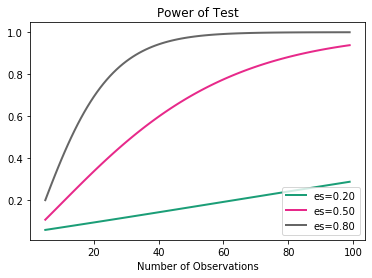

In [55]:
sample_sizes = np.array(range(5, 100))
effect_sizes = np.array([0.2, 0.5, 0.8])

# Create results object for t-test analysis
from statsmodels.stats.power import TTestIndPower
results = TTestIndPower()

# Plot the power analysis
results.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()